# COGS 108 - Final Project 

# Overview

In this project, I was given data on health inspections, yelp reviews, and geographical and demographical information for food establishments in some county of North Carolina that I deduced is near Raleigh. My goal was to find out if the scores of health inspections within this area were representative of the actual health and safety conditions of the buildings. I worked with the inspections and violations data in my EDA and combined certain aspects to determine if the scores could be informed by the number of violations. To do this, I split up the data by violation type and pointvalue (what I found to be severity) and performed a few regressions to see the relation between score and number of violations.

# Name & GitHub

- Name: John Girardini
- GitHub Username: JohnGirardini

# Research Question

How representative are Health Inspection scores of the actual health and safety conditions of establishments?

## Background and Prior Work

References (include links):
- 1)ABC grading system
        -"A": score >=90
        -"B": 80 <= score < 90
        -"C": score < 80

    
https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html
- 2) 'ABC' grading metric for health and safety standards may be misleading according to this article
    - As long as they do not add up too high, major and minor violations can stack up before a letter grade is dropped
        - 2 mjr+ 1 mnr
        - 2 mjr + 2 GRP
        - 1 mjr + 3 mnr
        - etc.
    
https://www.nbcsandiego.com/news/local/99-of-san-diego-restaurants-earn-a-grades-bringing-usefulness-of-system-into-question/25381/

- 3) North Carolina uses the same "ABC" grading System with their health inspections scores
    - Everywhere in the US uses this system, according to their website

https://www.cga.ct.gov/2005/rpt/2005-R-0403.htm

- 4) On the Raleigh County health inspections website, it lists two types of violations:
    - critical: has potential to cause foodborne ilness
    - non-critical: does not have potential to cause foodborne ilness
    - was unable to find anything about the point value system, however my explanation of the point system can be found in the analysis section

https://healthspace.com/clients/westvirginia/raleigh/raleigh_web_live.nsf



# Hypothesis


In my background research, I found that food establishments can get an 'A' on a health inspection with a few glaring health and safety code violations.
I hypothesize that the health inspection scores are not representative enough of the health and safety conditions of food establishments.

# Dataset(s)

- Dataset Name: "inspections.csv"
- Link to the dataset: https://datahub.ucsd.edu/user/jsgirard/edit/Final_Project/inspections.csv
- Number of observations: 18466 rows × 19 columns

This dataset contains the details of the health inspections of establishments in a county of North Carolina. It contains information about each individual inspection across different establishments and different dates. The data is a mixture of cateogrical and numerical.

- Dataset Name: "violations.csv"
- Link to the dataset: https://datahub.ucsd.edu/user/jsgirard/edit/Final_Project/violations.csv
- Number of observations: 189802 rows x 18 columns

This dataset contains information about the individual violations from health inspections that may or may not relate to the inspections dataset. It contains information about each infraction, including things like critical or non-critical and point values. This data set also has both categorical and numerical data types.

I plan on combining the individual infractions data to the inspections, differentiating between point-values and critical or non-critical. I think that this will shed some light on the varying weights of individual infractions.

## Data Limitations

The data sets have some limitations that make the analysis incomplete. The inspections data has the total number of violations listed per inspection of both categories. It does not discriminate between the different point values of each violation. I found in my EDA that the violations have different weights based on severity. In order to find these weighted deductions, I had to clean the violations data set and then combine it with the inspections data set.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt

import patsy
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

In [2]:
df_inspecs = pd.read_csv("inspections.csv")
df_viols = pd.read_csv("violations.csv")

In [3]:
df_viols.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


In [4]:
df_inspecs.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Data Cleaning

First and foremost, I removed any personally identifiable information from the datasets. Given the limitations stated above of the health inspections data, I had to get the specific violation types from that data set and combine it with the inspections dataset:
- I grouped it by hsisid, date, and whether it was a critical violation. 
- I then summed up all of the violations to get a gross amount per inspection. 
- Because I was unsure how to merge the two data sets on both hsisid and inspection date, I averaged both the scores data and the violations data over the entire time frame for every food establishment.
- Then, I was able to merge the datasets on hsisid.

In [5]:
df_viols['inspectdate'] = df_viols['inspectdate'].str.slice(start = 0, stop = 10)
df_viols.rename(columns = {'inspectdate':'date'}, inplace = True)
df_inspecs['date'] = df_inspecs['date'].str.slice(start = 0, stop = 10)

In [6]:
print(df_viols.columns)
df_inspecs.columns

Index(['X.objectid', 'hsisid', 'date', 'category', 'statecode', 'critical',
       'questionno', 'violationcode', 'severity', 'shortdesc', 'inspectedby',
       'comments', 'pointvalue', 'observationtype', 'violationtype', 'count',
       'cdcriskfactor', 'cdcdataitem'],
      dtype='object')


Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')

In [7]:
df_inspecs = df_inspecs.drop(['name', 'address1', 'address2', 'city', 'phonenumber', 'postalcode', 'state', 'city', 'x', 'y', 'zip', 'geocodestatus', 'inspectedby', 'inspector_id', 'avg_neighbor_num_critical', 'avg_neighbor_num_non_critical', 'top_match', 'second_match'], axis = 1)
df_inspecs.rename(columns = {'previous_inspection_by_same_inspector': 'same_inspec', 'inspection_num': 'inspec_num', 'num_critical' : 'num_crit', 'num_non_critical' : 'num_non_crit', 'num_critical_previous' : 'num_crit_prev', 'num_non_critical_previous' : 'num_non_crit_prev', 'num_critical_mean_previous' : 'num_crit_mean_prev', 'num_non_critical_mean_previous':'num_non_crit_mean_prev'})

,hsisid,date,restaurantopendate,days_from_open_date,facilitytype,type,description,inspec_num,previous_inspection_date,days_since_previous_inspection,same_inspec,score,num_crit,num_non_crit,num_crit_prev,num_non_crit_prev,num_crit_mean_prev,num_non_crit_mean_prev,critical
0,4092013748,2012-09-21,2002-12-21T00:00:00Z,3562,Restaurant,Inspection,This facility cooks eggs to order in Grill sta...,1,NaN,NaN,NaN,96.0,9,7,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21,2004-05-04T00:00:00Z,3062,Restaurant,Inspection,NaN,1,NaN,NaN,NaN,98.0,0,11,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21,2008-08-04T00:00:00Z,1509,Restaurant,Inspection,NaN,1,NaN,NaN,NaN,97.0,4,8,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21,2012-03-28T00:00:00Z,177,Restaurant,Inspection,NaN,1,NaN,NaN,NaN,99.0,2,3,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21,2008-02-25T00:00:00Z,1670,Food Stand,Inspection,"New rules, www.wakegov.com/food",1,NaN,NaN,NaN,97.0,2,4,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03,2002-08-19T00:00:00Z,5190,Food Stand,Inspection,NaN,10,2016-06-27T00:00:00Z,129.0,False,93.0,6,13,1.0,4.0,1.000000,4.777778,1
18462,4092110100,2016-11-03,1995-09-05T00:00:00Z,7730,Public School Lunchrooms,Inspection,NaN,9,2016-09-06T00:00:00Z,58.0,True,97.0,2,3,2.0,5.0,0.750000,3.250000,1
18463,4092110487,2016-11-03,2009-11-13T00:00:00Z,2547,Public School Lunchrooms,Inspection,NaN,9,2016-06-29T00:00:00Z,127.0,False,96.0,3,4,0.0,2.0,0.875000,1.750000,1
18464,4092300177,2016-11-03,2000-07-01T00:00:00Z,5969,Meat Market,Inspection,NaN,10,2016-06-15T00:00:00Z,141.0,False,99.0,1,2,0.0,3.0,1.111111,2.000000,1


In [8]:
df_viols.drop(columns = {'inspectedby'}, inplace=True)

In [9]:
df_inspecs = df_inspecs.rename(columns = {'facilitytype':'fac_type', 'inspection_num':'insp_num'})

In [10]:
df_viols.isnull().any()

X.objectid         False
hsisid             False
date               False
category           False
statecode          False
critical            True
questionno         False
violationcode      False
severity            True
shortdesc          False
comments            True
pointvalue         False
observationtype     True
violationtype       True
count               True
cdcriskfactor       True
cdcdataitem         True
dtype: bool

In [11]:
df_inspecs.isnull().any()

hsisid                                   False
date                                     False
restaurantopendate                       False
days_from_open_date                      False
fac_type                                 False
type                                     False
description                               True
insp_num                                 False
previous_inspection_date                  True
days_since_previous_inspection            True
previous_inspection_by_same_inspector     True
score                                    False
num_critical                             False
num_non_critical                         False
num_critical_previous                     True
num_non_critical_previous                 True
num_critical_mean_previous                True
num_non_critical_mean_previous            True
critical                                 False
dtype: bool

In [12]:
len(df_inspecs['hsisid'].unique())

3045

In [13]:
len(df_viols['hsisid'].unique())

4270

In [14]:
print(sum(df_viols['pointvalue'] == 0))
print(sum(df_viols['pointvalue'] == 1))
print(sum(df_viols['pointvalue'] == 2))
print(sum(df_viols['pointvalue'] == 3))
print(sum(df_viols['pointvalue'] == 4))

134007
48846
5170
1769
10


In [15]:
sum(df_viols['pointvalue'])

64533

In [16]:
df2 = pd.DataFrame(df_viols.groupby(['hsisid', 'date', 'critical'])['pointvalue'].sum())
df2.reset_index(inplace=True)
df2_crit = df2[df2['critical'] == 'Yes']
df2_non_crit = df2[df2['critical'] == 'No']

df2_crit_avg = pd.DataFrame(df2_crit.groupby(['hsisid'])['pointvalue'].mean())
df2_crit_avg.rename(columns = {'pointvalue':'avg_crit'}, inplace=True)

df2_non_crit_avg = pd.DataFrame(df2_non_crit.groupby(['hsisid'])['pointvalue'].mean())
df2_non_crit_avg.rename(columns = {'pointvalue':'avg_non_crit'}, inplace=True)

df2_avg = df2_non_crit_avg.merge(df2_crit_avg, on='hsisid')
df2_avg

,avg_non_crit,avg_crit
hsisid,,
4092010018,1.166667,2.666667
4092010024,2.000000,1.125000
4092010031,0.500000,2.000000
4092010035,2.000000,0.500000
4092010037,1.400000,0.800000
...,...,...
4092300270,0.250000,1.333333
4092300271,2.000000,3.000000
4092300272,0.000000,2.000000


In [17]:
df_inspecs_avg = pd.DataFrame(df_inspecs.groupby('hsisid')['score'].mean())
df_inspecs_avg

,score
hsisid,
4092010018,94.333333
4092010024,94.772727
4092010031,94.375000
4092010035,94.500000
4092010037,96.400000
...,...
4092300270,98.000000
4092300271,92.500000
4092300272,96.500000


In [18]:
df_i_v = df_inspecs_avg.merge(df2_avg, on='hsisid')
df_i_v

,score,avg_non_crit,avg_crit
hsisid,,,
4092010018,94.333333,1.166667,2.666667
4092010024,94.772727,2.000000,1.125000
4092010031,94.375000,0.500000,2.000000
4092010035,94.500000,2.000000,0.500000
4092010037,96.400000,1.400000,0.800000
...,...,...,...
4092300269,97.300000,0.000000,1.250000
4092300270,98.000000,0.250000,1.333333
4092300271,92.500000,2.000000,3.000000


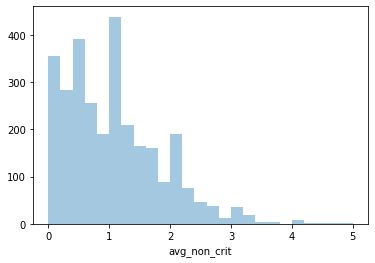

In [19]:
sns.distplot(df_i_v['avg_non_crit'], kde = False, bins = 25)

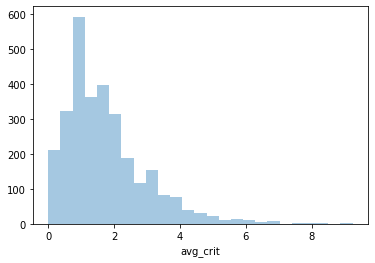

In [20]:
sns.distplot(df_i_v['avg_crit'], kde = False, bins = 25)

In [21]:
def log_viols(num):
    num = num + 1
    return np.log10(num)

In [22]:
df_i_v['log_avg_crit'] = df_i_v['avg_crit'].apply(log_viols)
df_i_v['log_avg_non_crit'] = df_i_v['avg_non_crit'].apply(log_viols)
df_i_v

,score,avg_non_crit,avg_crit,log_avg_crit,log_avg_non_crit
hsisid,,,,,
4092010018,94.333333,1.166667,2.666667,0.564271,0.335792
4092010024,94.772727,2.000000,1.125000,0.327359,0.477121
4092010031,94.375000,0.500000,2.000000,0.477121,0.176091
4092010035,94.500000,2.000000,0.500000,0.176091,0.477121
4092010037,96.400000,1.400000,0.800000,0.255273,0.380211
...,...,...,...,...,...
4092300269,97.300000,0.000000,1.250000,0.352183,0.000000
4092300270,98.000000,0.250000,1.333333,0.367977,0.096910
4092300271,92.500000,2.000000,3.000000,0.602060,0.477121


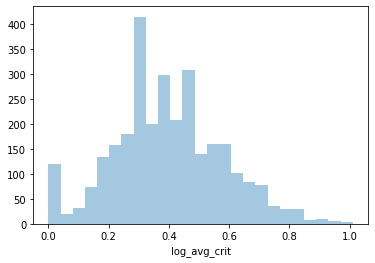

In [23]:
sns.distplot(df_i_v['log_avg_crit'], kde = False, bins = 25)

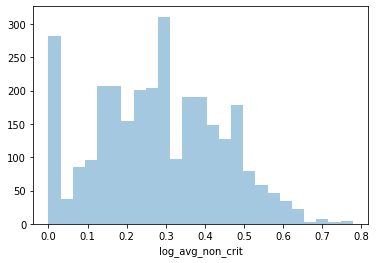

In [24]:
sns.distplot(df_i_v['log_avg_non_crit'], kde = False, bins = 25)

In [25]:
q_low = df_i_v["score"].quantile(0.01)
q_high = df_i_v["score"].quantile(0.99)
q_low
q_high

99.5

In [26]:
df_i_v_adj = df_i_v.loc[df_i_v['score']>q_low]
df_i_v_adj = df_i_v_adj.loc[df_i_v_adj['score']<q_high]
df_i_v_adj.shape

(2914, 5)

In [27]:
print(sum(df_i_v['score']>q_high))
print(sum(df_i_v['score']<q_low))
df_i_v.shape

13
29


(2978, 5)

In [28]:
q_low_crit = df_i_v["log_avg_crit"].quantile(0.01)
q_high_crit = df_i_v["log_avg_crit"].quantile(0.99)
print(q_low_crit, q_high_crit)

0.0 0.8450980400142569


In [29]:
q_low_non_crit = df_i_v["log_avg_non_crit"].quantile(0.01)
q_high_non_crit = df_i_v["log_avg_non_crit"].quantile(0.99)
print(q_low_non_crit, q_high_non_crit)

0.0 0.6368220975871743


In [30]:
df_i_v_final = df_i_v_adj.loc[df_i_v_adj['log_avg_crit']<q_high_crit]
df_i_v_final = df_i_v_final.loc[df_i_v_final['log_avg_non_crit']<q_high_non_crit]

In [31]:
df_i_v_final.shape

(2884, 5)

# Data Analysis & Results

The ending data distribution after cleaning was very right-skewed, having more establishments with little to no average gross point deductions, which you would expect as a result of this type of grading system. The scores data was very concentrated toward 'A's, which can also be expected, but it was more widely varied across the 'A' range. In order to normalize the violations data, I performed a log transformation, which worked to make it slightly more normal.

There were also outliers in both data sets, which I removed according to a 99th percentile range.

I performed a multivariate linear regression and two single variable linear regressions on the average scores vs the average gross critical and non-critical point deductions. The multivariate regression fit better as I expected, as both variables had an impact on the score, although they had slightly different weights.

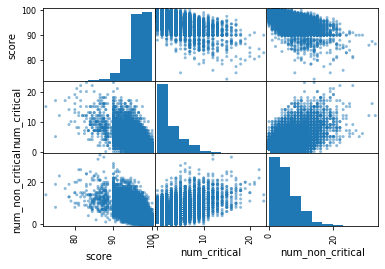

In [32]:
df_inspecs_sub = df_inspecs[['score', 'num_critical', 'num_non_critical']]
first_fig = pd.plotting.scatter_matrix(df_inspecs_sub)

This graph contains a scattermatrix showing raw unedited correlations between score, number of critical violations, and number of non-critical violations. A correlation can be seen between score and each of the violations variables, and a smaller correlation can be seen between critical and non-critical violations.

Text(0.5, 1.0, 'Score Variation')

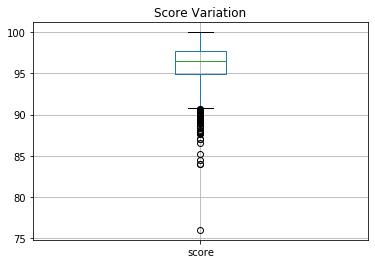

In [33]:
df_i_v.boxplot(column = 'score')
plt.title('Score Variation')

This graph contains a box and whisker plot of the scores data. It shows that the scores have a massive concentration within the 'A' range with a smaller number of outliers below it according to the size of the data set.

In [34]:
outcome, predictors = patsy.dmatrices('score ~ log_avg_crit + log_avg_non_crit', df_i_v_final)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     5345.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:25:32   Log-Likelihood:                -3703.9
No. Observations:                2884   AIC:                             7414.
Df Residuals:                    2881   BIC:                             7432.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          100.5393      0.045  

In [36]:
outcome_crit, predictors_crit = patsy.dmatrices('score ~ log_avg_crit', df_i_v_final)
mod_crit = sm.OLS(outcome_crit, predictors_crit)
res_crit = mod_crit.fit()
print(res_crit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     4390.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:25:32   Log-Likelihood:                -4604.0
No. Observations:                2884   AIC:                             9212.
Df Residuals:                    2882   BIC:                             9224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       99.6002      0.055   1805.850   

In [37]:
outcome_non_crit, predictors_non_crit = patsy.dmatrices('score ~ log_avg_non_crit', df_i_v_final)
mod_non_crit = sm.OLS(outcome_non_crit, predictors_non_crit)
res_non_crit = mod_non_crit.fit()
print(res_non_crit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     2003.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:25:32   Log-Likelihood:                -5177.8
No. Observations:                2884   AIC:                         1.036e+04
Df Residuals:                    2882   BIC:                         1.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           98.4129      0.055  

Text(0.5, 1.0, 'Score vs Log of Gross Critical Violations')

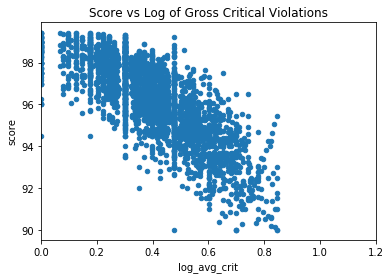

In [38]:
ax1 = df_i_v_final.plot(x='log_avg_crit', y='score', kind='scatter', xlim=(0,1.2))
plt.title('Score vs Log of Gross Critical Violations', fontdict=None, loc='center', pad=None)

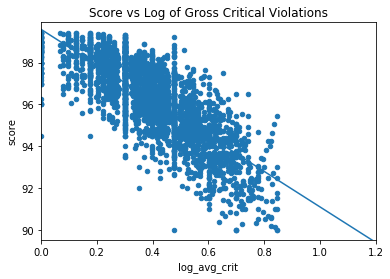

In [39]:
abline_plot(model_results=mod_crit.fit(), ax=ax1)

The two above graphs show the scatterplot of the average scores vs the log of the average gross critical point deductions. On the second graph, the regression line obtained from a OLS regression is included to show the trend of the data.

Text(0.5, 1.0, 'Score vs Log of Gross Non-Critical Violations')

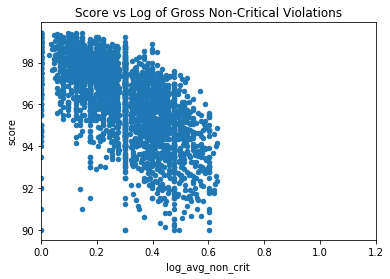

In [40]:
ax2 = df_i_v_final.plot(x='log_avg_non_crit', y='score', kind='scatter', xlim=(0,1.2))
plt.title('Score vs Log of Gross Non-Critical Violations', fontdict=None, loc='center', pad=None)

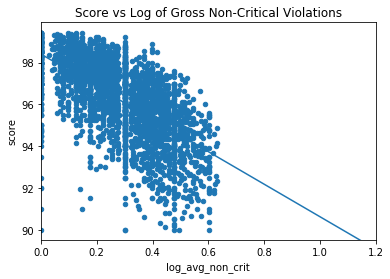

In [41]:
abline_plot(model_results=mod_non_crit.fit(), ax=ax2)

The two above graphs show the scatterplot of the average scores vs the log of the average gross non-critical point deductions. On the second graph, the regression line obtained from a OLS regression is included to show the trend of the data.

In [44]:
non_crit_to_B = (90 - 100.5)/(-.898)
crit_to_B = non_crit_to_B/2
print(crit_to_B, non_crit_to_B)

5.846325167037862 11.692650334075724


In [45]:
non_crit_to_C = (80 - 100.5)/(-.898)
crit_to_C = non_crit_to_C/2
print(crit_to_C, non_crit_to_C)
non_crit_to_C = (80-100.5)

11.414253897550111 22.828507795100222


# Ethics & Privacy

In order to protect the privacy of those who contributed to the datasets, information has been witheld that could personally identify anyone involved. During data cleaning, I dropped all columns of the data sets that were personally identifiable. I also ommitted information about things like zipcode and city name, just in case they might violate the Safe Harbor rules. I also removed columns containing any geographical information for the reason that it might violate Safe Harbor principles and because it was not relevant to my analysis.

# Conclusion & Discussion

The goal of this project was to determine if the scores were representative of the actual health and safety conditions of the establishments. To determine this, I combined the data from the inspections with the individual violations data. I merged the averages of the scores with the averages of the gross total point deductions (between critical and non-critical). Then, after a log transformation for uniformity in the predictor variables, I ran a multivariate regression to predict average score from average gross critical and non-critical point deductions. From this regression line, I found that the approximate point deductions on an average inspection to drop from an 'A' to a 'B' is about 10 non-critical and 5 critical. I came to these values by using the multivariable regression line and the assumption that, based on the rest of the data, there are usually about twice as many non-critical violations as critical violations. 

Based on my findings, I can conclude that the scores of health inspections in this region are, in fact, representative of the actual health and safety conditions within the establishments. Since these numbers are average gross point deductions, this means that there can be any combination of multiple 1, 2, 3, or 4 point deductions to sum up to the values. The 5 total critical point deductions means that there can only be two maximum severe point deductions, which seems fair to the establishments as an average range for an 'A'. The regression begins to lose credibility below a 90%, because only about 2% of the data falls below this score. However, this would make sense for the average scores over the entire period, because the purpose of the violations would be to promote better practices, encouraging restaurants to keep their scores high. Overall, I would approve of this health inspection point system.

In my original research proposal, I suggested the utility of yelp reviews in gauging a customer's perspective on the health and safety conditions of a food establishment. I feel like this would be an important, albeit possibly biased, perspective on the effectiveness of the inspections. In the future, if customer reviews could be obtained, a text analysis could be used to add another metric to use in analyzing the effectiveness of the scores in describing an establishment's health standards. In this project, averages were taken across all inspections for individual establishments. If I had more time, I would have liked to figure out how to combine the inspections and violations data on the hsisid and inspection date to see if the model could be improved in any way.